## Multiple Linear Regression

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

## 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [2]:
#loading dataset
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.shape

(1436, 11)

In [5]:
## checking for null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
## checking for duplicates
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
#droping duplicates
df.drop_duplicates(inplace=True,ignore_index=True)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
#converting non-numrical columns into numerical column
df=pd.get_dummies(df,dtype=int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1431,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1432,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1433,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


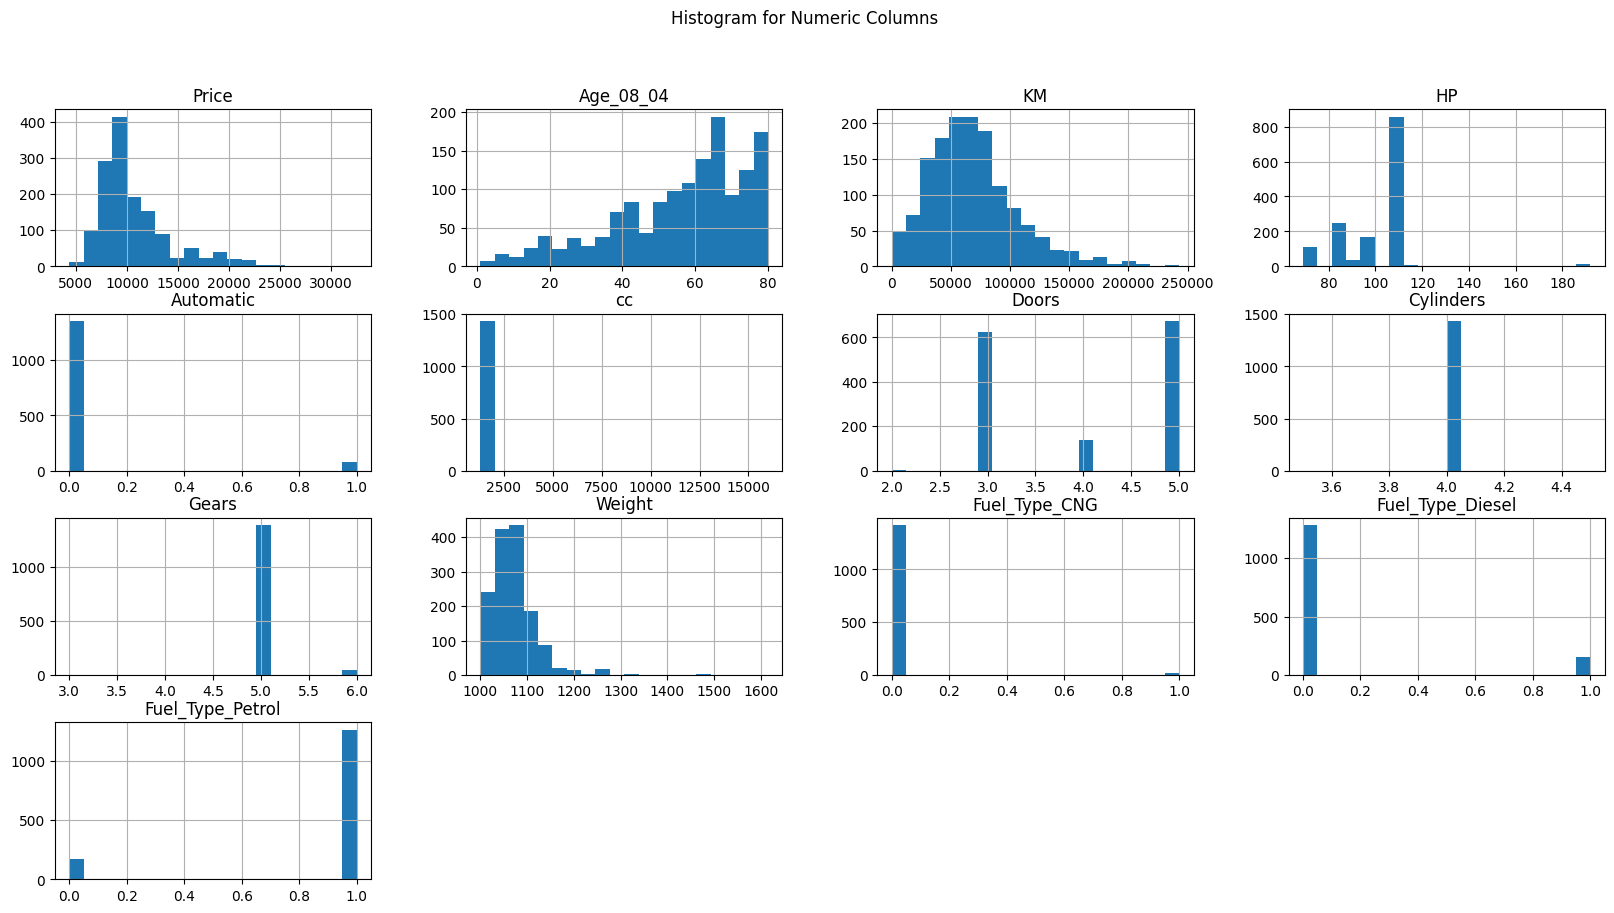

In [9]:
# ploting Histogram

df.hist(bins=20,figsize=(20,10))
plt.suptitle('Histogram for Numeric Columns')
plt.show()

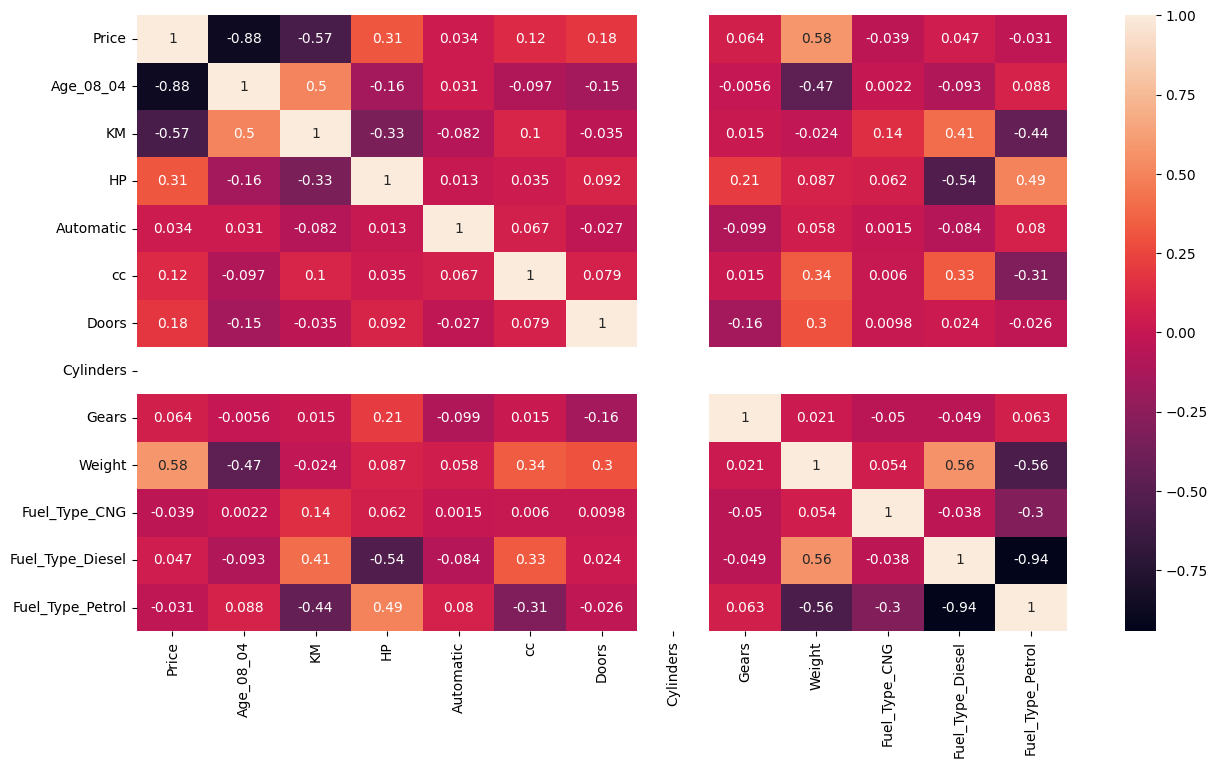

In [10]:
#plotinh Heatmap
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

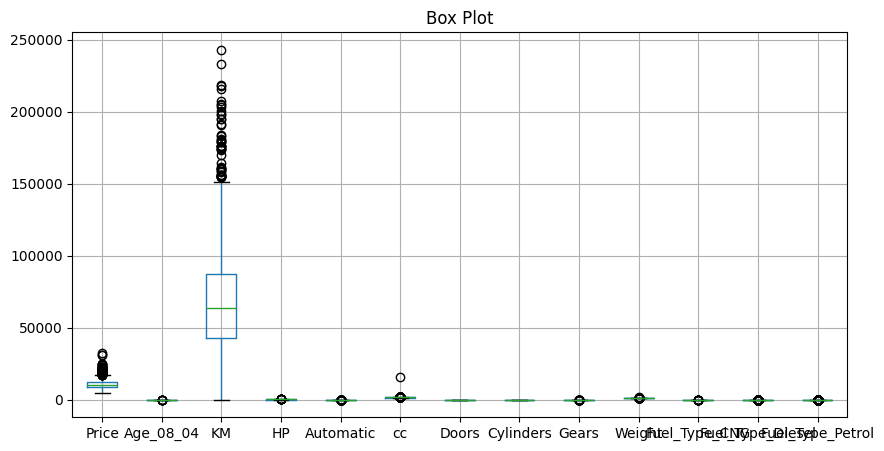

In [11]:
#ploting Boxplot to identify and remove outliers
df.boxplot(figsize=(10,5))
plt.title('Box Plot')
plt.show()

In [12]:
#removing outliers

def outlier_cappin(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extrem=Q1-1.5*IQR
    upper_extrem=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extrem if x<lower_extrem else upper_extrem if x>upper_extrem else x)


for col in df.select_dtypes(['int','float']).columns:
    outlier_cappin(df,col)



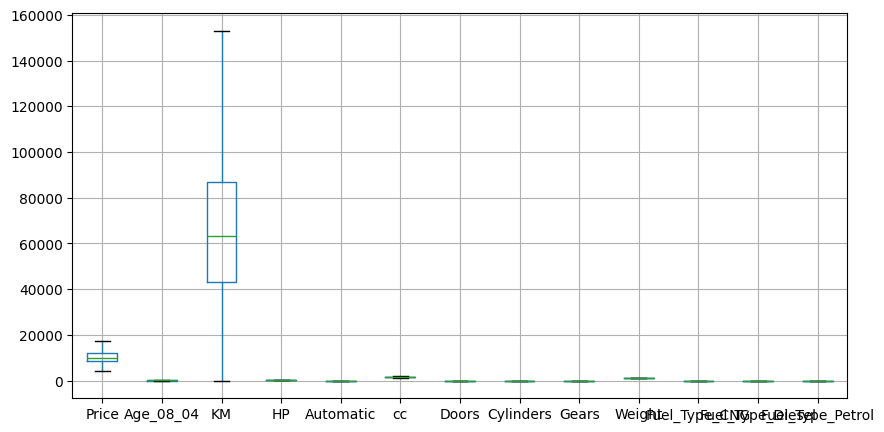

In [13]:
df.boxplot(figsize=(10,5))
plt.show()

## 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [14]:
# selecting  target and features
target=df[['Price']]
features=df.drop(columns=['Price'])

In [15]:
print(target.head())
print(features.head())

     Price
0  13500.0
1  13750.0
2  13950.0
3  14950.0
4  13750.0
   Age_08_04       KM    HP  Automatic      cc  Doors  Cylinders  Gears  \
0       23.0  46986.0  90.0        0.0  1900.0      3          4    5.0   
1       23.0  72937.0  90.0        0.0  1900.0      3          4    5.0   
2       24.0  41711.0  90.0        0.0  1900.0      3          4    5.0   
3       26.0  48000.0  90.0        0.0  1900.0      3          4    5.0   
4       30.0  38500.0  90.0        0.0  1900.0      3          4    5.0   

   Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0  1152.5            0.0               0.0               1.0  
1  1152.5            0.0               0.0               1.0  
2  1152.5            0.0               0.0               1.0  
3  1152.5            0.0               0.0               1.0  
4  1152.5            0.0               0.0               1.0  


In [16]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=50)
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

      Age_08_04         KM     HP  Automatic      cc  Doors  Cylinders  Gears  \
897        65.0   60000.00   86.0        0.0  1300.0      3          4    5.0   
772        67.0   77821.00  110.0        0.0  1600.0      5          4    5.0   
262        40.0   50640.00  110.0        0.0  1600.0      5          4    5.0   
1305       76.0   70039.00  110.0        0.0  1600.0      3          4    5.0   
1061       80.0  153103.75   86.0        0.0  1300.0      3          4    5.0   

      Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
897   1015.0            0.0               0.0               1.0  
772   1075.0            0.0               0.0               1.0  
262   1075.0            0.0               0.0               1.0  
1305  1050.0            0.0               0.0               1.0  
1061  1015.0            0.0               0.0               1.0  
      Age_08_04        KM     HP  Automatic      cc  Doors  Cylinders  Gears  \
1192       70.0   89983.0  110.0     

## 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

## Method 1

In [17]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [47]:
print("Intercept:",lin_model.intercept_)
print("Coefficientl:",lin_model.coef_)

Intercept: [-6293.25825329]
Coefficientl: [[-1.06473358e+02 -1.47482413e-02  2.49980130e+01  1.77635684e-14
  -2.57223011e+00 -9.41641293e+01  0.00000000e+00  0.00000000e+00
   2.39605057e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [19]:
y_pred=lin_model.predict(x_train)
r2_score(y_train,y_pred)

0.8664429212872538

In [20]:
y_pred1=lin_model.predict(x_test)
r2_score(y_test,y_pred1)

0.853327400258405

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
lin_model_mse=mean_squared_error(y_test,y_pred1)
lin_model_r2=r2_score(y_test,y_pred1)

In [48]:
print("lin_model_mse:",lin_model_mse)
print("lin_model_r2:",lin_model_r2)

lin_model_mse: 1410388.6758652139
lin_model_r2: 0.853327400258405


# Method 2

In [23]:
x=df.drop(['Price','HP','Doors','Gears','Cylinders','Fuel_Type_CNG','Automatic'],axis=1)
y=df[['Price']]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
lin_model2=LinearRegression()

In [26]:
lin_model2.fit(x_train,y_train)

LinearRegression()

In [27]:
print("coefficient:",lin_model.coef_)
print("intercept:",lin_model2.intercept_)

coefficient: [[-1.06473358e+02 -1.47482413e-02  2.49980130e+01  1.77635684e-14
  -2.57223011e+00 -9.41641293e+01  0.00000000e+00  0.00000000e+00
   2.39605057e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
intercept: [-1133.30914056]


In [ ]:
y_perd=lin_model2.predict(x_test)
lin_model2_mse=mean_squared_error(y_test,y_pred1)
lin_model2_r2=r2_score(y_test,y_pred1)

In [29]:
print("mse:",lin_model2_mse)
print("r2_score:",lin_model2_r2)

mse: 16600430.406255426
r2_score: -0.686422038372509


## Method 3

In [30]:
from sklearn.linear_model import Lasso,Ridge
features1=df.drop("Price",axis=1)
target1=df[["Price"]]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,test_size=0.2,random_state=100)

In [32]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [33]:
print('Intercept:',lasso.intercept_) 
print('coefficient:',lasso.coef_)

Intercept: [-7350.27307384]
coefficient: [-1.05298094e+02 -1.58141755e-02  2.64534466e+01  0.00000000e+00
 -2.45353803e+00 -8.02032007e+01  0.00000000e+00  0.00000000e+00
  2.46000218e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [34]:
y_pred2=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred2)
lasso_r2=r2_score(y_test,y_pred2)

In [35]:
print("mse:",lasso_mse)
print("r2:",lasso_r2)

mse: 1293518.4951050992
r2: 0.8473485413722637


## 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [36]:
model_metrics=pd.DataFrame({
    'MEAN SQUARED ERROR':[lin_model_mse,lin_model2_mse,lasso_mse],
    'R2 VALUE':[lin_model_r2,lin_model2_r2,lasso_r2]
},index=['Model 1','Model 2','Model 3'])
model_metrics


,MEAN SQUARED ERROR,R2 VALUE
Model 1,1.410389e+06,0.853327
Model 2,1.660043e+07,-0.686422
Model 3,1.293518e+06,0.847349


## 5.Apply Lasso and Ridge methods on the model.

## LASSO Method

In [37]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [38]:
print('Intercept:',lasso.intercept_) 
print('coefficient:',lasso.coef_)

Intercept: [-7350.27307384]
coefficient: [-1.05298094e+02 -1.58141755e-02  2.64534466e+01  0.00000000e+00
 -2.45353803e+00 -8.02032007e+01  0.00000000e+00  0.00000000e+00
  2.46000218e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [39]:
y_pred2=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred2)
lasso_r2=r2_score(y_test,y_pred2)

In [40]:
print("mse:",lasso_mse)
print("r2score:l",lasso_r2)

mse: 1293518.4951050992
r2score:l 0.8473485413722637


## RIDGE METHOD

In [41]:
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [42]:
y_pred3=ridge.predict(x_test)
ridge_mse=mean_squared_error(y_test,y_pred3)
ridge_r2=r2_score(y_test,y_pred3)

In [43]:
print('Intercept',ridge.intercept_) 
print('coefficient',ridge.coef_)

Intercept [-7369.76165702]
coefficient [[-1.05292918e+02 -1.58098457e-02  2.64794667e+01  0.00000000e+00
  -2.45695254e+00 -8.15557561e+01  0.00000000e+00  0.00000000e+00
   2.46253299e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [44]:
print("mse:",ridge_mse)
print("r2:",ridge_r2)

mse: 1293407.1788821989
r2: 0.8473616780872462


## Interviwe Questions

## 1.What is Normalization & Standardization and how is it helpful?

In [45]:
# Normalization scales the features to a range between 0 and 1
# whereas standardization scales the features so that they have mean 0 and standard deviation 1. 
# Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.


## 2.What techniques can be used to address multicollinearity in multiple linear regression?

In [46]:
# - Remove one of the correlated variables.
# - Combine the correlated variables into a single feature.
# - Use dimensionality reduction techniques like Principal Component Analysis (PCA).
# - Regularization techniques like Lasso and Ridge regression.

# Assumptions made during the analysis:
# - The dataset is assumed to be representative of the population.
# - The relationship between the independent variables and the dependent variable is linear.

# Implications of assumptions:
# Violation of these assumptions may lead to biased estimates and incorrect inferences. 
# It's important to validate these assumptions before interpreting the results.